In [3]:
#Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [4]:
#Loading the Train and Test CSV files
train = pd.read_csv("C:/Users/mayur/OneDrive/Documents/Rutgers/Project/train.csv")
test = pd.read_csv("C:/Users/mayur/OneDrive/Documents/Rutgers/Project/test.csv")

In [5]:
#Checking the size of our data
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [6]:
#Checking the train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Checking the Test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
#Train has 81 columns, while Test has 80 columns. This is because test does not contain the Sale Price.

#We use MatPlotLib to visualize our data
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
#Exploring the data that we have

#We try to get the statistics of the Sale Price using the describe() function
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


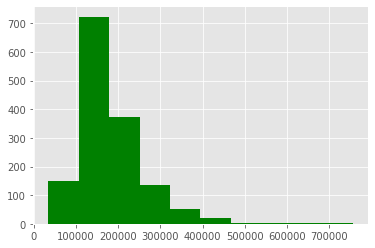

In [10]:
#Checking the skewness and plotting Histogram of Sale Price
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='green')
plt.show()

Skew is: 0.12133506220520406


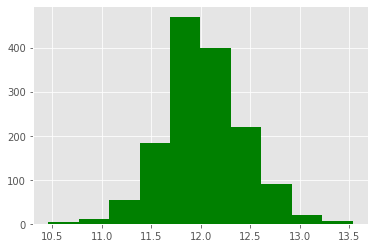

In [11]:
#We Log Transform the Sale Price to get a skew value closer to 0 and to have a normal distribution.
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [12]:
#Working with Numeric Features. We only select the features that have a numeric value and plot them.
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [13]:
#Examining the Correrlation b/w the numeric features and Sale Price, which is our target variable.
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [14]:
#The first 5 features are most positively correlated with Sale Price, while the next 5 are the most negatively corrrelated.

#Now, we try to get the unique values from OverallQual using the unique() function
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [15]:
#We create a pivot table to check the relationship b/w OverallQual and Sale Price.
#Using OverallQual as the index value and SalePrice as the score

quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


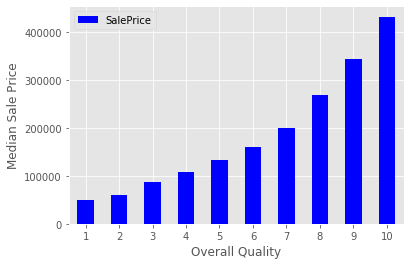

In [16]:
#We visualize the OverallQual alongside the Median of the Sale Price values to get a better idea, using the plot() function

quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


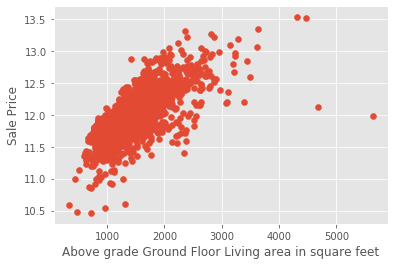

In [17]:
#Visualzing Ground Floor Living Area vs Sale Price using scatter() function

plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade Ground Floor Living area in square feet')
plt.show()

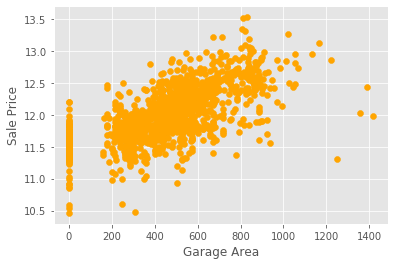

In [18]:
#Increase in ground living area, leads to a corresponding increase in Sale Price.

#Let us try the same with Garage Area vs Sale Price
plt.scatter(x=train['GarageArea'], y=target, color='orange')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [19]:
#We have several homes with Garage Area = 0. This is because these homes don't have a garage. 
#There are also many outliers that don't give us a proper regression line.
#We shall remove the outliers to get a proper regression

train = train[train['GarageArea'] < 1200]

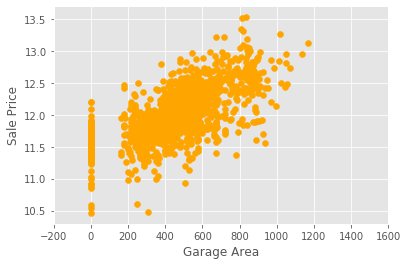

In [20]:
#Plotting the scatter plot again for Garage Area vs Sale Price

plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice), color='orange')
plt.xlim(-200,1600) #This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


In [21]:
#Null Values

nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [22]:
#Getting the unique values from MiscFeature column
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [23]:
#Now we consider the non-numeric values

categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [24]:
#Transforming and Engg Features

#Examing Street Data
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [25]:
#We use One-Hot encoding to transform the non-numeric value to a Boolean value.
#We do this for both the datasets.

train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [26]:
#Encoding the Pavement and Gravel as 1 and 0

print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


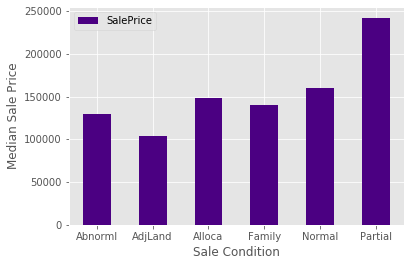

In [27]:
#Sale Condition vs Sale Price

condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='indigo')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [28]:
#'Partial' Sale condition has a higher Sale Price than the others. We shall encode this feature.

#Take partial condition as 1 and rest as 0

def encode(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

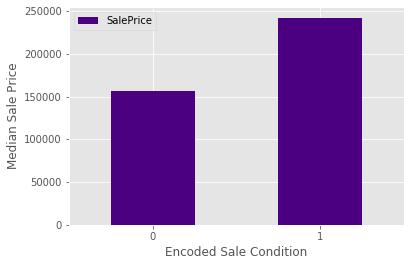

In [29]:
#Plotting the new encoded feature

condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='indigo')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


In [30]:
#Using interpolate() function to assign average values to missing values

data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [31]:
sum(data.isnull().sum() != 0)

0

In [32]:
#Building a Linear Model
#np.log() to log transform the target variable which is the Sale Price
#We will drop Sale Price and ID from our features list

y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [33]:
#Use Train Test Split to create Training and Hold Out Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [34]:
#Modelling Starts

from sklearn import linear_model
lr = linear_model.LinearRegression()

In [35]:
#Fitting the Model

model = lr.fit(X_train, y_train)

In [36]:
#Evaluation and Visualization

#R-squared measures how close is the data and the fitted regression line

print ("R-squared value is: \n", model.score(X_test, y_test))

R-squared value is: 
 0.8882477709262531


In [37]:
predictions = model.predict(X_test)

In [38]:
#RMSE is a measure of the distance between Predicted and Actual values

from sklearn.metrics import mean_squared_error
print ('Root Mean Squared Error is: \n', mean_squared_error(y_test, predictions))

Root Mean Squared Error is: 
 0.01784179451956794


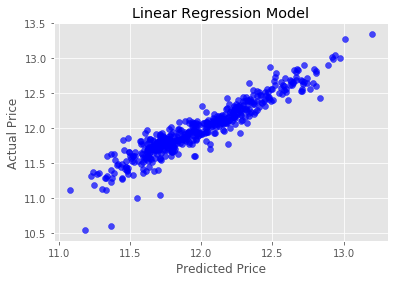

In [39]:
#Visualizing the relationship between Predicted and Actual Price
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='blue') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

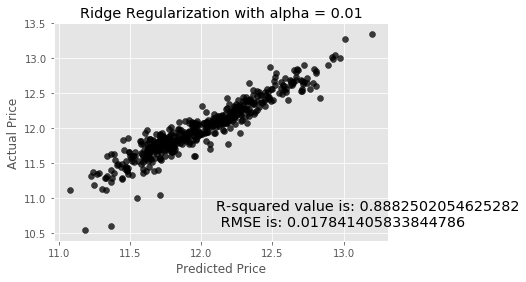

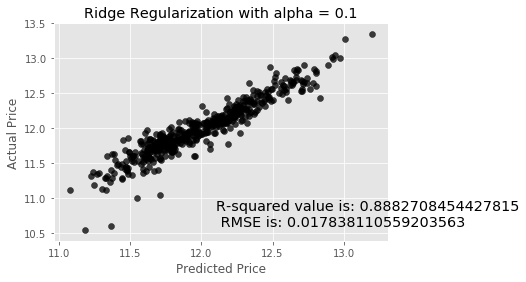

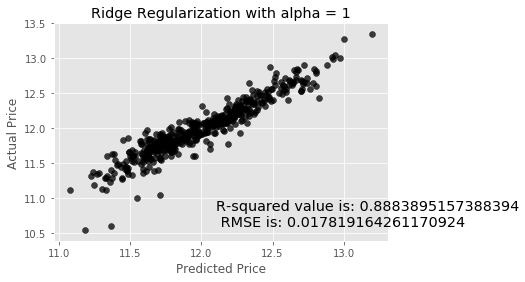

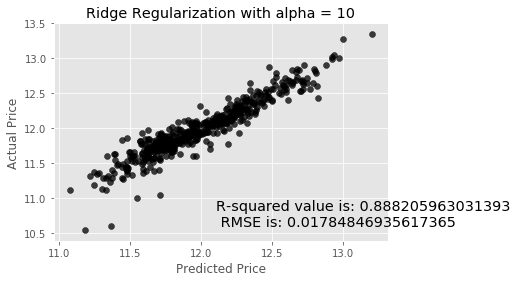

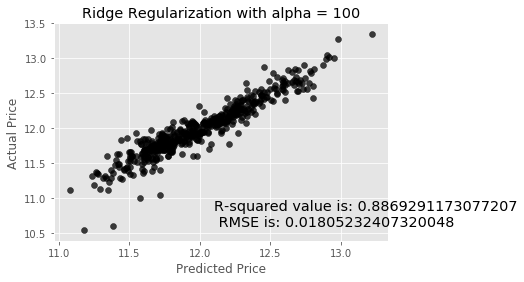

In [40]:
#Improving the Model

#Ridge Regularization

for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='black')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R-squared value is: {}\n RMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [41]:
#Making a CSV file for predicted Sale Prices

submission = pd.DataFrame()
submission['Id'] = test.Id

In [42]:
#Selecting features for our model

feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [43]:
#Generating Predictions

predictions = model.predict(feats)

In [44]:
#Retransforming the log transform back to exponential form

final_predictions = np.exp(predictions)

In [45]:
#Difference between both the results are as follows

print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions are: 
 [128959.49172585 122920.74024358 175704.82598102 200050.83263755
 182075.46986405]


In [46]:
#Checking our predictions

submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [48]:
#Creating a CSV file for Sale Prices

submission.to_csv('Sale Prices.csv', index=False)

In [50]:
FinalModel=pd.read_csv('Sale Prices.csv')
FinalModel

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864
...,...,...
1454,2915,97120.457957
1455,2916,98661.530074
1456,2917,184435.363039
1457,2918,109901.826465
